# Small Introduction 

### Monkeypox
**Monkeypox is a viral zoonosis (a virus transmitted to humans from animals) with symptoms similar to those seen in the past in smallpox patients, although it is clinically less severe. With the eradication of smallpox in 1980 and subsequent cessation of smallpox vaccination, monkeypox has emerged as the most important orthopoxvirus for public health. Monkeypox primarily occurs in central and west Africa, often in proximity to tropical rainforests, and has been increasingly appearing in urban areas. Animal hosts include a range of rodents and non-human primates.**
Source = [here](https://www.who.int/news-room/fact-sheets/detail/monkeypox)

## Measles
**Measles is a childhood infection caused by a virus. Once quite common, measles can now almost always be prevented with a vaccine.
Also called rubeola, measles spreads easily and can be serious and even fatal for small children. While death rates have been falling worldwide as more children receive the measles vaccine, the disease still kills more than 200,000 people a year, mostly children.**
Source = [here](https://www.mayoclinic.org/diseases-conditions/measles/symptoms-causes/syc-20374857)

## Our work
**The above-mentioned diseases were combined into one main file, and the file was divided into two files, and then each file was divided into a training part and a test part, and the data was dealt with on that basis.**


**That's it,
Now let's get the `code` / `Python` talking-**

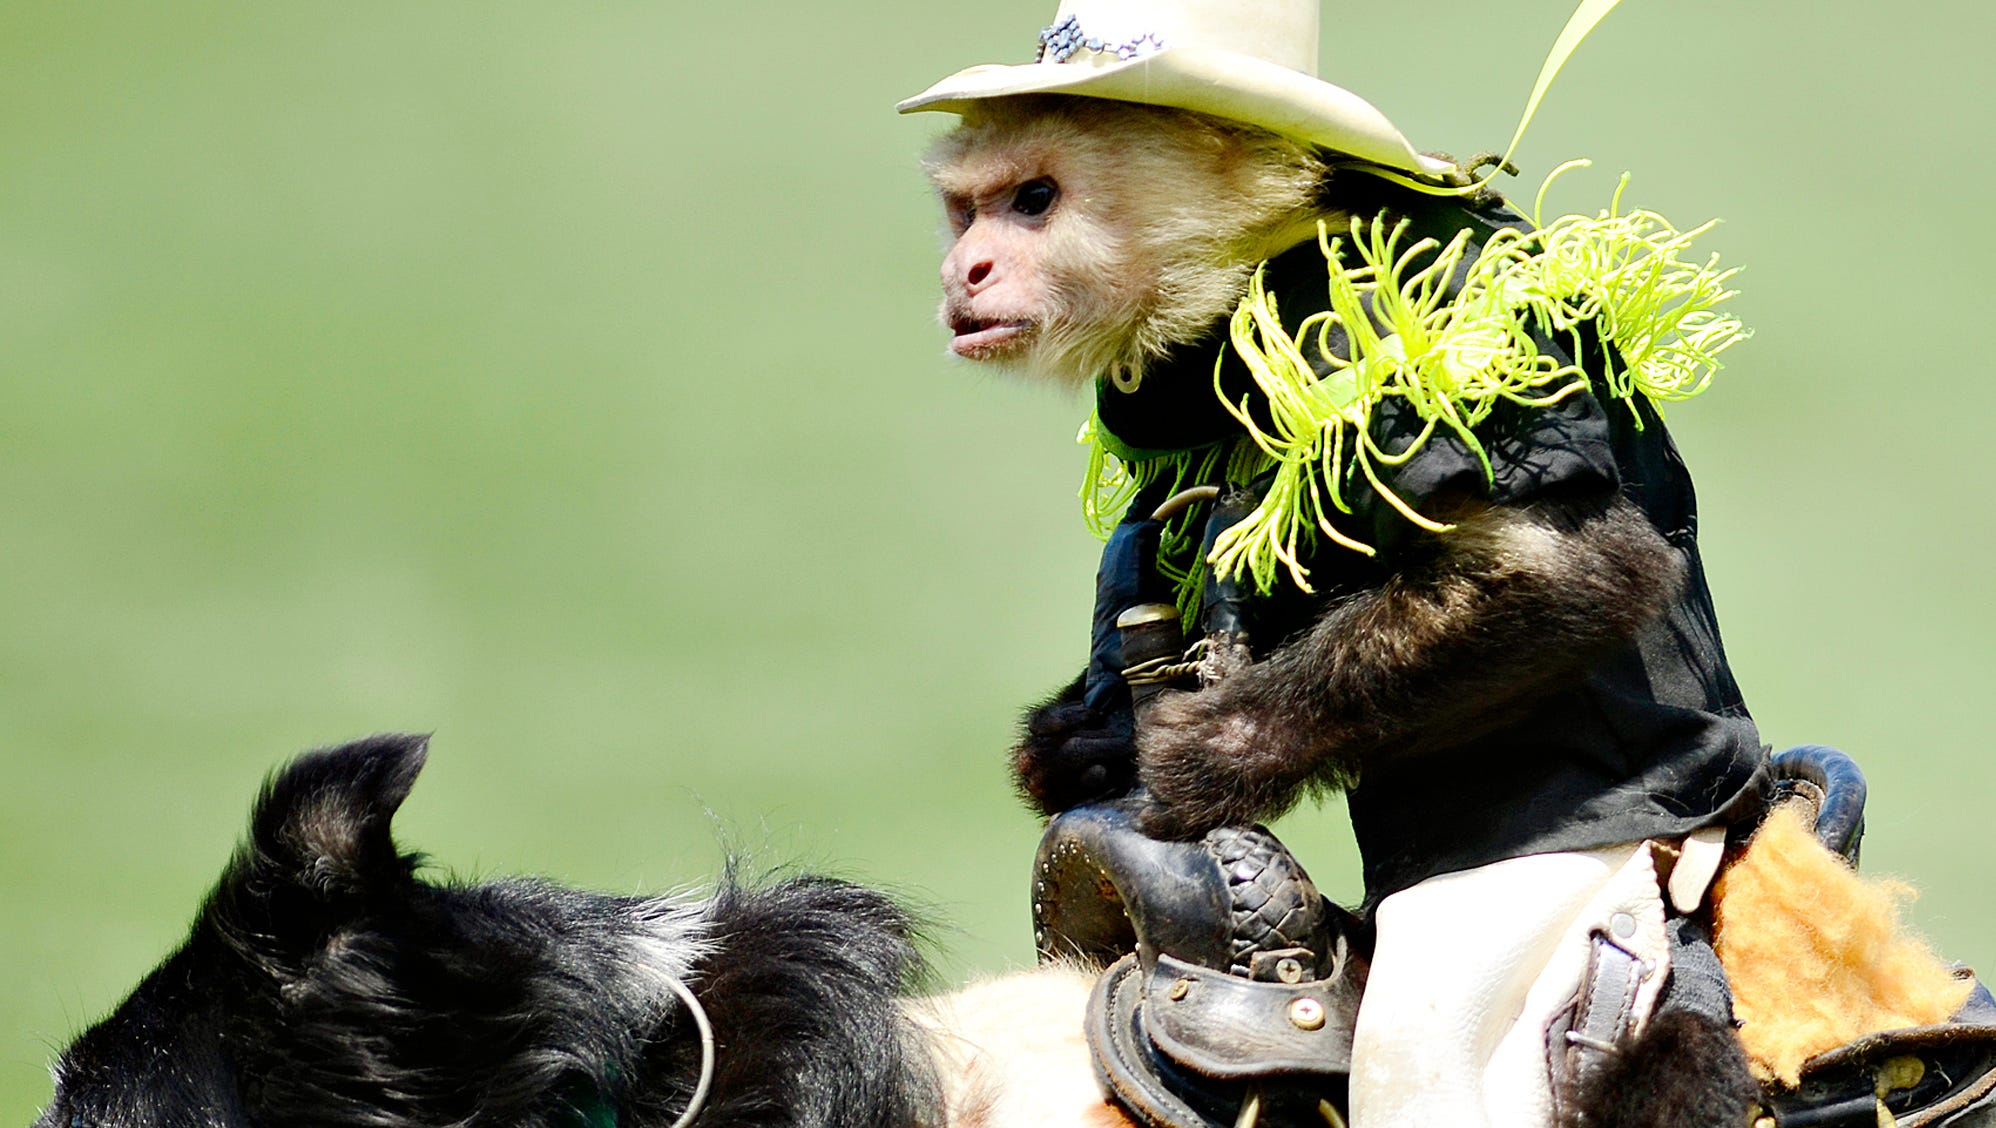

In [ ]:
Agenda = {
    1:"Importing what I want",
    2:"Loading our data",
    3:"Becoming one with data (data preparation and data exploration)",
    4:"Transforming our data",
    5:"Loading image data using ImageFolder",
    6:"Building pre-traind model (model_0)",
    7:"model_0 results",
    8:"Git all together and Built the function",
    9:"Make prediction with all image data"
}

Agenda

{1: 'Importing what I want',
 2: 'Loading our data',
 3: 'Becoming one with data (data preparation and data exploration)',
 4: 'Transforming our data',
 5: 'Loading image data using ImageFolder',
 6: 'Building pre-traind model (model_0)',
 7: 'model_0 results',
 8: 'Git all together and Built the function',
 9: 'Make prediction with all image data'}

## 1. Importing what I want

In [ ]:
# import some basic lib 
import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# import some lib to help loading our data 
import os
import glob
import zipfile
import requests
from pathlib import Path

# Iam sorry PyTorch I will import tensorflow
import tensorflow as tf
from tensorflow.keras.utils import get_file

## 2. Loading our data

In [ ]:
def download_and_extract_dataset():
    
  # set the link of data
  train_url = "https://github.com/aly202012/Monkeypox-data/archive/refs/heads/master.zip"
  for i, download_link in enumerate([train_url]):
    temp_file = f"temp{i}.zip"
    data_dir = get_file(origin=download_link, fname=os.path.join(os.getcwd(), temp_file))
    print("Extracting", download_link)
    with zipfile.ZipFile(data_dir, "r") as z:
      z.extractall("data")
    # remove the temp file
    os.remove(temp_file)

# comment the below line if you already downloaded the dataset
download_and_extract_dataset()

78217216/Unknown - 5s 0us/stepExtracting https://github.com/aly202012/Monkeypox-data/archive/refs/heads/master.zip


In [ ]:
# set some important variables with some links 
# be careful this step is a tricky 
data_path = Path("data/")
image_path = data_path / Path("Monkeypox-data-master/MonkeypoxandMeasles/")

for i in (data_path, image_path):
    if i.is_dir():
        print(f"{i} already exsist....")
    else:
        print(f"{i} error...not found")

data already exsist....
data/Monkeypox-data-master/MonkeypoxandMeasles already exsist....


## 3. Becoming one with data (data preparation and data exploration)

In [ ]:
# creating a function to help us
def walk_through_dir(dir_path):
    for dirpath, dirname, filename in os.walk(dir_path):
        print(f"There are {len(dirname)} directories and {len(filename)} images in {dirpath}")

In [ ]:
walk_through_dir(image_path)

There are 2 directories and 0 images in data/Monkeypox-data-master/MonkeypoxandMeasles
There are 2 directories and 0 images in data/Monkeypox-data-master/MonkeypoxandMeasles/test
There are 0 directories and 8 images in data/Monkeypox-data-master/MonkeypoxandMeasles/test/Measles
There are 0 directories and 8 images in data/Monkeypox-data-master/MonkeypoxandMeasles/test/Monkeypox
There are 2 directories and 0 images in data/Monkeypox-data-master/MonkeypoxandMeasles/train
There are 0 directories and 19 images in data/Monkeypox-data-master/MonkeypoxandMeasles/train/Measles
There are 0 directories and 35 images in data/Monkeypox-data-master/MonkeypoxandMeasles/train/Monkeypox


In [ ]:
train_dir = image_path / "train"
test_dir = image_path / "test"

train_dir, test_dir

(PosixPath('data/Monkeypox-data-master/MonkeypoxandMeasles/train'),
 PosixPath('data/Monkeypox-data-master/MonkeypoxandMeasles/test'))

## 3.1 Visualizing some images

In [ ]:
image_path

PosixPath('data/Monkeypox-data-master/MonkeypoxandMeasles')

Random image path: data/Monkeypox-data-master/MonkeypoxandMeasles/train/Monkeypox/9.jpg
Image class: Monkeypox
Image size: (252, 200)


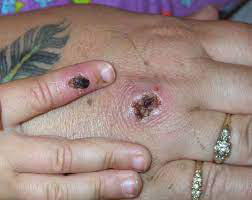

In [ ]:
from PIL import Image

# get all image pth in one place
image_path_list = list(image_path.glob("*/*/*.jpg"))

# choice a random image from list which we created
random_image_path = random.choice(image_path_list)

# git image class from path name
image_class = random_image_path.parent.stem

# open the image
img = Image.open(random_image_path)

# print some matadata about the image 
print(f"Random image path: {random_image_path}")
print(f"Image class: {image_class}")
print(f"Image size: {img.size}")

# call the image 
img

## 3.2 visualize the image with `matplotlib`

Text(0.5, 1.0, 'Image class is: Monkeypox | Image shape:(200, 252, 3)')

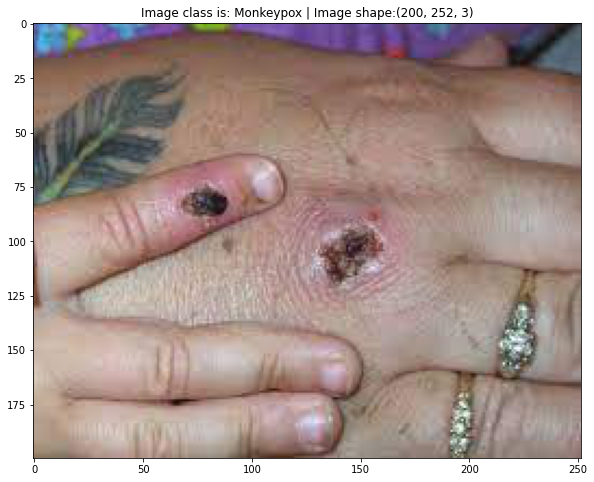

In [ ]:
# turn the image into an array
img_as_array = np.asarray(img)

# plot the image 
plt.figure(figsize = (10,8))
plt.imshow(img_as_array)
plt.title(f"Image class is: {image_class} | Image shape:{img_as_array.shape}")

## 4. Transforming our data

I will use PyTorch to complete my work

In [ ]:
# import torch
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

## 4.1 Transforming the data with `torchvision.transfrms`

In [ ]:
# transforming images
data_transform = transforms.Compose([
    transforms.Resize(size = (64, 64)),
    transforms.RandomHorizontalFlip(p = 0.5),
    transforms.ToTensor()
])

data_transform

Compose(
    Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=None)
    RandomHorizontalFlip(p=0.5)
    ToTensor()
)

In [ ]:
# lets applay transforming on oue image 
print(f"Original Image shape: {img_as_array.shape}")

# applay
img_tr = data_transform(img)
print(f"The new shape of image: {img_tr.shape}")

# note
print("I know there is some differance in the order, but there is no problem")

Original Image shape: (200, 252, 3)
The new shape of image: torch.Size([3, 64, 64])
I know there is some differance in the order, but there is no problem


In [ ]:
# plto and compare between images
def plot_transformed_images(image_path: list, transform, n: int, seed = None):
    if seed:
        random.seed(seed)
    random_image_path = random.sample(image_path, k = n)
    for image_path in random_image_path:
        with Image.open(image_path) as f:
            fig, ax = plt.subplots(nrows = 1, ncols = 2)
            ax[0].imshow(f)
            ax[0].set_title(f"Original\nSize: {f.size}")
            ax[0].axis(False)
               
            # transform and plt target image 
            transformed_image = transform(f).permute(1,2,0)
            ax[1].imshow(transformed_image)
            ax[1].set_title(f"Transformed\nShape: {transformed_image.shape}")
            ax[1].axis("off")
               
            fig.suptitle(f"class: {image_path.parent.stem}", fontsize = 16)

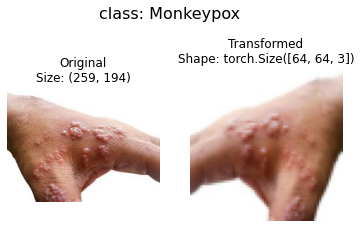

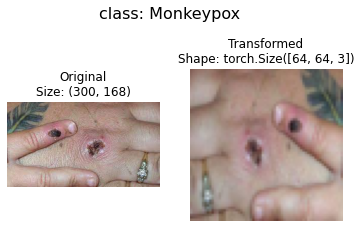

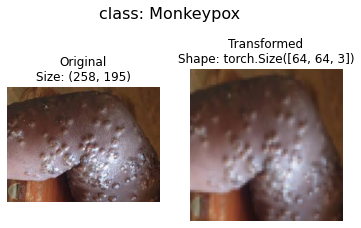

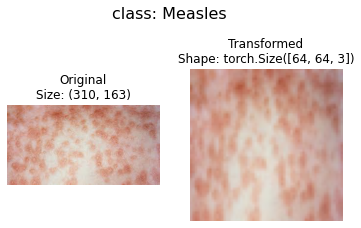

In [ ]:
# calling the function
plot_transformed_images(image_path = image_path_list,
                       transform = data_transform,
                       n = 4,
                       seed = None)

## 5. Loading image data using `ImageFolder`

In [ ]:
# create the dataset by using ImageFolder

# train_data
train_data = datasets.ImageFolder(root = train_dir,
                                 transform = data_transform,
                                 target_transform = None)

# test_data
test_data = datasets.ImageFolder(root = test_dir,
                                 transform = data_transform,
                                 target_transform = None)

train_data, test_data

(Dataset ImageFolder
     Number of datapoints: 54
     Root location: data/Monkeypox-data-master/MonkeypoxandMeasles/train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=None)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ), Dataset ImageFolder
     Number of datapoints: 16
     Root location: data/Monkeypox-data-master/MonkeypoxandMeasles/test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=None)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ))

In [ ]:
class_names = train_data.classes
class_names

['Measles', 'Monkeypox']

In [ ]:
class_dict = train_data.class_to_idx
class_dict

{'Measles': 0, 'Monkeypox': 1}

In [ ]:
len(train_data), len(test_data)

(54, 16)

In [ ]:
# some details about single image 
img, label = train_data[0][0], train_data[0][1]

print(f"Image tensor: \n {img}")
print(f"Image shape:{img.shape}")
print(f"Image data type: {img.dtype}")
print(f"Image label is:{label}")
print(f"label data type: {type(label)}")

Image tensor: 
 tensor([[[0.0549, 0.0235, 0.0039,  ..., 0.0118, 0.0118, 0.0118],
         [0.0078, 0.0118, 0.0235,  ..., 0.0118, 0.0118, 0.0118],
         [0.0196, 0.0392, 0.0471,  ..., 0.0118, 0.0118, 0.0118],
         ...,
         [0.8941, 0.8706, 0.8353,  ..., 0.0039, 0.0039, 0.0078],
         [0.8824, 0.8588, 0.8196,  ..., 0.0039, 0.0078, 0.0118],
         [0.8667, 0.8471, 0.8039,  ..., 0.0039, 0.0118, 0.0157]],

        [[0.1647, 0.0902, 0.0667,  ..., 0.0157, 0.0157, 0.0157],
         [0.0784, 0.0588, 0.0784,  ..., 0.0157, 0.0157, 0.0157],
         [0.0627, 0.0824, 0.0980,  ..., 0.0157, 0.0157, 0.0157],
         ...,
         [0.6039, 0.5843, 0.5451,  ..., 0.1059, 0.1020, 0.1059],
         [0.5922, 0.5686, 0.5294,  ..., 0.1059, 0.1059, 0.1098],
         [0.5725, 0.5569, 0.5176,  ..., 0.1059, 0.1098, 0.1137]],

        [[0.1490, 0.0863, 0.0667,  ..., 0.0353, 0.0353, 0.0353],
         [0.0706, 0.0667, 0.0824,  ..., 0.0353, 0.0353, 0.0353],
         [0.0667, 0.0863, 0.1020,  ..., 0.

## 5.1 Turn loaded image into `DataLoader`

In [ ]:
# show number of workers
os.cpu_count()

2

In [ ]:
# turn train and test datasets into dataloader
Batch_size = 1

#train_data
train_loader= DataLoader(dataset = train_data,
                       batch_size = Batch_size,
                       num_workers = 4,
                       shuffle = True)

# test_data
test_loader= DataLoader(dataset = test_data,
                       batch_size = Batch_size,
                       num_workers = 4)

train_loader, test_loader

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:566: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


(<torch.utils.data.dataloader.DataLoader at 0x7fddfa71e9d0>,
 <torch.utils.data.dataloader.DataLoader at 0x7fddfa71e690>)

In [ ]:
len(train_loader), len(test_loader)

(54, 16)

In [ ]:
# lets take a look at some details 
img, label = next(iter(train_loader))

# batch size will be 1 now
print(f"Image shape is:{img.shape}")
print(f"Label shape is:{label.shape}")

Image shape is:torch.Size([1, 3, 64, 64])
Label shape is:torch.Size([1])


## 5.2 Createa function to display random images 

In [ ]:
def display_random_images(dataset: torch.utils.data.Dataset,
                         classes,
                         n: int(10),
                         display_shape: bool,
                         seed: int):
    # set limit to number of images 
    if n>10:
        n = 10
        display_shape = False
        print("for display n shouldn't be larger than 10")
    else:
        display_shape = True
        
    if seed:
        random.seed(seed)
        
    random_samples_idx = random.sample(range(len(dataset)), k = n)
    
    plt.figure(figsize = (16,8))
    
    for i, targ_sample in enumerate(random_samples_idx):
        targ_image, targ_label = dataset[targ_sample][0], dataset[targ_sample][1]
        targ_image_adjust = targ_image.permute(1, 2, 0)
        # plot adjusted image
        plt.subplot(1, n, i+1)
        plt.imshow(targ_image_adjust)
        plt.axis("off")
        
        if classes:
            title = f"class: {classes[targ_label]}"
            if display_shape:
                title = title + f"\nShape: {targ_image_adjust.shape}"
        plt.title(title)

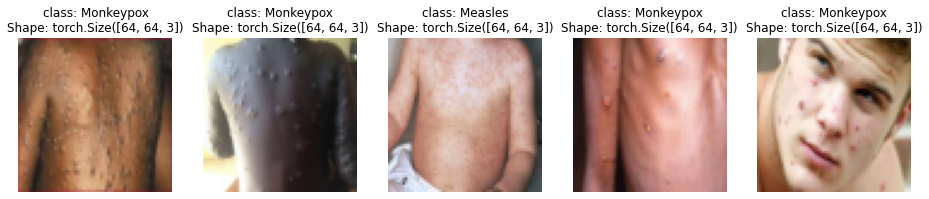

In [ ]:
# display random image from the imagefolder created dataset from train data
display_random_images(train_data,
                    n = 5,
                    classes = class_names,
                    display_shape = True,
                    seed = None)

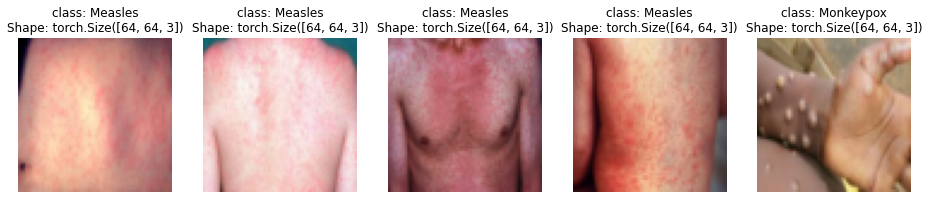

In [ ]:
# display random image from the imagefolder created dataset from test data
display_random_images(test_data,
                    n = 5,
                    classes = class_names,
                    display_shape = True,
                    seed = None)

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

## 6. Building pre-traind model (model_0)

In [ ]:
# import the lib
import torchvision

In [ ]:
# model architecture
model_0 = torchvision.models.efficientnet_b0(pretrained = True)
model_0

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=EfficientNet_B0_Weights.IMAGENET1K_V1`. You can also use `weights=EfficientNet_B0_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


EfficientNet(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): SiLU(inplace=True)
    )
    (1): Sequential(
      (0): MBConv(
        (block): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
            (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (2): SiLU(inplace=True)
          )
          (1): SqueezeExcitation(
            (avgpool): AdaptiveAvgPool2d(output_size=1)
            (fc1): Conv2d(32, 8, kernel_size=(1, 1), stride=(1, 1))
            (fc2): Conv2d(8, 32, kernel_size=(1, 1), stride=(1, 1))
            (activation): SiLU(inplace=True)
            (scale_activation): Sigmoid()
          )
          (2): Conv2dNormActivat

## 6.1 some important notation 

In [ ]:
# lets look to the classification part in model and the input and output 
model_0.classifier

Sequential(
  (0): Dropout(p=0.2, inplace=True)
  (1): Linear(in_features=1280, out_features=1000, bias=True)
)

In [ ]:
try:
    import torchinfo
    print(f"torchinfo version is:{torchinfo.__version__}")
except:
    !pip install torchinfo
    import torchinfo
    print(f"Trochinfo version is:{torchinfo.__version__}")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Trochinfo version is:1.7.0


In [ ]:
from torchinfo import summary

summary(model = model_0,
       input_size = (1,3,64,64),
       col_names = ["input_size", "output_size", "num_params", "trainable"],
       col_width = 20,
       row_settings = ["var_names"])

Layer (type (var_name))                                      Input Shape          Output Shape         Param #              Trainable
EfficientNet (EfficientNet)                                  [1, 3, 64, 64]       [1, 1000]            --                   True
├─Sequential (features)                                      [1, 3, 64, 64]       [1, 1280, 2, 2]      --                   True
│    └─Conv2dNormActivation (0)                              [1, 3, 64, 64]       [1, 32, 32, 32]      --                   True
│    │    └─Conv2d (0)                                       [1, 3, 64, 64]       [1, 32, 32, 32]      864                  True
│    │    └─BatchNorm2d (1)                                  [1, 32, 32, 32]      [1, 32, 32, 32]      64                   True
│    │    └─SiLU (2)                                         [1, 32, 32, 32]      [1, 32, 32, 32]      --                   --
│    └─Sequential (1)                                        [1, 32, 32, 32]      [1, 16, 32, 

In [ ]:
# freeze all of the base layers in the model
for param in model_0.features.parameters():
    param.requires_grad = False

In [ ]:
# setup or update the classifier head of the model
from torch import nn

torch.manual_seed(42)

model_0.classifier = nn.Sequential(
    nn.Dropout( p = 0.2, inplace = True),
    nn.Linear(in_features = 1280, 
             out_features = len(class_names))
)

model_0.classifier

Sequential(
  (0): Dropout(p=0.2, inplace=True)
  (1): Linear(in_features=1280, out_features=2, bias=True)
)

In [ ]:
summary(model = model_0,
       input_size=(1,3,64,64),
       col_names = ["input_size", "output_size", "num_params", "trainable"],
       col_width = 20,
       row_settings = ["var_names"])

Layer (type (var_name))                                      Input Shape          Output Shape         Param #              Trainable
EfficientNet (EfficientNet)                                  [1, 3, 64, 64]       [1, 2]               --                   Partial
├─Sequential (features)                                      [1, 3, 64, 64]       [1, 1280, 2, 2]      --                   False
│    └─Conv2dNormActivation (0)                              [1, 3, 64, 64]       [1, 32, 32, 32]      --                   False
│    │    └─Conv2d (0)                                       [1, 3, 64, 64]       [1, 32, 32, 32]      (864)                False
│    │    └─BatchNorm2d (1)                                  [1, 32, 32, 32]      [1, 32, 32, 32]      (64)                 False
│    │    └─SiLU (2)                                         [1, 32, 32, 32]      [1, 32, 32, 32]      --                   --
│    └─Sequential (1)                                        [1, 32, 32, 32]      [1, 1

## 6.2 Setupt the loss and optimization function

In [ ]:
# loss function
loss_fn = nn.CrossEntropyLoss()

# the optimizer 
optimizer = torch.optim.Adam(model_0.parameters(), lr = 0.001)

## 6.3 Functional some loops like train, test, evaluate

In [ ]:
# dunction train_step()
def train_step(model: torch.nn.Module,
              data_loader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              optimizer: torch.optim.Optimizer):
    
    # put the model in train mode
    model.train()
    
    train_loss, train_acc = 0, 0
    
    # starting the loop
    for batch, (x,y) in enumerate(data_loader):
        
        # 1. forward pass
        y_pred = model(x)
        
        # 2. calculate the loss 
        loss = loss_fn(y_pred, y)
        # update the loss value 
        train_loss += loss.item()
        
        # 3.optimizer the zero grad
        optimizer.zero_grad()
        
        # 4. loss backward
        loss.backward()
        
        # 5. optimizer step
        optimizer.step()
        
        # Calculate accuracy metric
        y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
        train_acc += (y_pred_class==y).sum().item()/len(y_pred)
  
    # Adjust metrics to get average loss and accuracy per batch
    train_loss = train_loss / len(data_loader)
    train_acc = train_acc / len(data_loader) 
    return train_loss, train_acc

In [ ]:
# Create a test step
def test_step(model: torch.nn.Module,
              data_loader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module):
  # Put model in eval mode
  model.eval()

  # Setup test loss and test accuracy values
  test_loss, test_acc = 0,  0

  # Turn on inference mode
  with torch.inference_mode():
    # Loop through DataLoader batches
    for batch, (X, y) in enumerate(data_loader): 


      # 1. Forward pass
      test_pred_logits = model(X)

      # 2. Calculate the loss
      loss = loss_fn(test_pred_logits, y)
      test_loss += loss.item()

      # Calculate the accuracy
      test_pred_labels = test_pred_logits.argmax(dim=1)
      test_acc += ((test_pred_labels == y).sum().item()/len(test_pred_labels))

  # Adjust metrics to get average loss and accuracy per batch
  test_loss = test_loss / len(data_loader)
  test_acc = test_acc / len(data_loader)
  return test_loss, test_acc

In [ ]:
from tqdm.auto import tqdm

# 1. Create a train function that takes in various model parameters + optimizer + dataloaders + loss function
def train(model: torch.nn.Module,
          train_dataloader,
          test_dataloader,
          optimizer,
          loss_fn: torch.nn.Module = nn.CrossEntropyLoss(),
          epochs: int = 5):
  
  # 2. Create empty results dictionary
  results = {"train_loss": [],
             "train_acc": [],
             "test_loss": [],
             "test_acc": []}
  
  # 3. Loop through training and testing steps for a number of epochs
  for epoch in tqdm(range(epochs)):
    train_loss, train_acc = train_step(model=model,
                                       dataloader=train_dataloader,
                                       loss_fn=loss_fn,
                                       optimizer=optimizer)
    test_loss, test_acc = test_step(model=model,
                                    dataloader=test_dataloader,
                                    loss_fn=loss_fn)
    
    # 4. Print out what's happening
    print(f"Epoch: {epoch} | Train loss: {train_loss:.4f} | Train acc: {train_acc:.4f} | Test loss: {test_loss:.4f} | Test acc: {test_acc:.4f}")

    # 5. Update results dictionary
    results["train_loss"].append(train_loss)
    results["train_acc"].append(train_acc)
    results["test_loss"].append(test_loss)
    results["test_acc"].append(test_acc)
  
  # 6. Return the filled results at the end of the epochs
  return results

In [ ]:
# try to import the going_modular directory
try:
    from going_modular.going_modular import data_setup, engine
except:
    # Get the going_modular scripts from github
    print("[INFO] Couldn't find going_modular scripts... downloading them from GitHub.")
    !git clone https://github.com/mrdbourke/pytorch-deep-learning
    !mv pytorch-deep-learning/going_modular .
    !rm -rf pytorch-deep-learning
    from going_modular.going_modular import data_setup, engine

[INFO] Couldn't find going_modular scripts... downloading them from GitHub.
Cloning into 'pytorch-deep-learning'...
remote: Enumerating objects: 3097, done.
remote: Counting objects: 100% (30/30), done.
remote: Compressing objects: 100% (22/22), done.
remote: Total 3097 (delta 11), reused 26 (delta 7), pack-reused 3067
Receiving objects: 100% (3097/3097), 639.02 MiB | 17.83 MiB/s, done.
Resolving deltas: 100% (1763/1763), done.
Checking out files: 100% (218/218), done.


## 6.4 Training the model

In [ ]:
torch.manual_seed(42)

NUM_EPOCHS = 13

from timeit import default_timer as timer
start_time = timer()

# Train model 1
model_0_results = engine.train(model=model_0,
                        train_dataloader=train_loader,
                        test_dataloader=test_loader,
                        optimizer=optimizer,
                        loss_fn=loss_fn,
                        epochs=NUM_EPOCHS,
                        device = device)

# End the timer and print out how long it took
end_time = timer()
print(f"Total training time for model_1: {end_time-start_time:.3f} seconds")

  0%|          | 0/13 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 0.7263 | train_acc: 0.6111 | test_loss: 1.4044 | test_acc: 0.5000
Epoch: 2 | train_loss: 0.6613 | train_acc: 0.6481 | test_loss: 2.5174 | test_acc: 0.4375
Epoch: 3 | train_loss: 0.6447 | train_acc: 0.6481 | test_loss: 3.6197 | test_acc: 0.4375
Epoch: 4 | train_loss: 0.6658 | train_acc: 0.6481 | test_loss: 3.1223 | test_acc: 0.5000
Epoch: 5 | train_loss: 0.6705 | train_acc: 0.5926 | test_loss: 1.3226 | test_acc: 0.6875
Epoch: 6 | train_loss: 0.6285 | train_acc: 0.7037 | test_loss: 1.9191 | test_acc: 0.2500
Epoch: 7 | train_loss: 0.5891 | train_acc: 0.6852 | test_loss: 3.0802 | test_acc: 0.5000
Epoch: 8 | train_loss: 0.6656 | train_acc: 0.6667 | test_loss: 2.0467 | test_acc: 0.5000
Epoch: 9 | train_loss: 0.5759 | train_acc: 0.6852 | test_loss: 2.9256 | test_acc: 0.3750
Epoch: 10 | train_loss: 0.6195 | train_acc: 0.6852 | test_loss: 19.5891 | test_acc: 0.2500
Epoch: 11 | train_loss: 0.5438 | train_acc: 0.7222 | test_loss: 2.5189 | test_acc: 0.5625
Epoch: 12 | train_

## 7. model_0 results

In [ ]:
model_0_results

{'train_loss': [0.7262779021704638,
  0.6612865273599271,
  0.6446836748056941,
  0.6657507463737771,
  0.67050043631483,
  0.6284885031205637,
  0.5890517052676942,
  0.6655771790279282,
  0.5758954427308507,
  0.6194787353829101,
  0.5438124393975293,
  0.5455315480077708,
  0.6223637928013448],
 'train_acc': [0.6111111111111112,
  0.6481481481481481,
  0.6481481481481481,
  0.6481481481481481,
  0.5925925925925926,
  0.7037037037037037,
  0.6851851851851852,
  0.6666666666666666,
  0.6851851851851852,
  0.6851851851851852,
  0.7222222222222222,
  0.7037037037037037,
  0.6666666666666666],
 'test_loss': [1.4044053972465917,
  2.5173683345547033,
  3.6197482974021113,
  3.1222779864037875,
  1.3226371152214256,
  1.91912975453306,
  3.0801888507012336,
  2.0467145161528606,
  2.925572695086842,
  19.589098318079778,
  2.518888610695285,
  2.1229660703756963,
  0.8539307279863801],
 'test_acc': [0.5,
  0.4375,
  0.4375,
  0.5,
  0.6875,
  0.25,
  0.5,
  0.5,
  0.375,
  0.25,
  0.5625,


## 7.1 plot the loss curve of model_0

In [ ]:
model_0_results.keys()

dict_keys(['train_loss', 'train_acc', 'test_loss', 'test_acc'])

In [ ]:
def plot_loss_curves(results):

  # Get the loss values of the results dictionary(training and test)
  loss = results["train_loss"]
  test_loss = results["test_loss"]

  # Get the accuracy values of the results dictionary (training and test)
  accuracy = results["train_acc"]
  test_accuracy = results["test_acc"]

  # Figure out how mnay epochs there were
  epochs = range(len(results["train_loss"]))

  # Setup a plot
  plt.figure(figsize=(15, 7))

  # Plot the loss
  plt.subplot(1, 2, 1)
  plt.plot(epochs, loss, label="train_loss")
  plt.plot(epochs, test_loss, label="test_loss")
  plt.title("Loss")
  plt.xlabel("Epochs")
  plt.legend() 

  # Plot the accuracy
  plt.subplot(1, 2, 2)
  plt.plot(epochs, accuracy, label="train_accuracy")
  plt.plot(epochs, test_accuracy, label="test_accuracy")
  plt.title("Accuracy")
  plt.xlabel("Epochs")
  plt.legend();

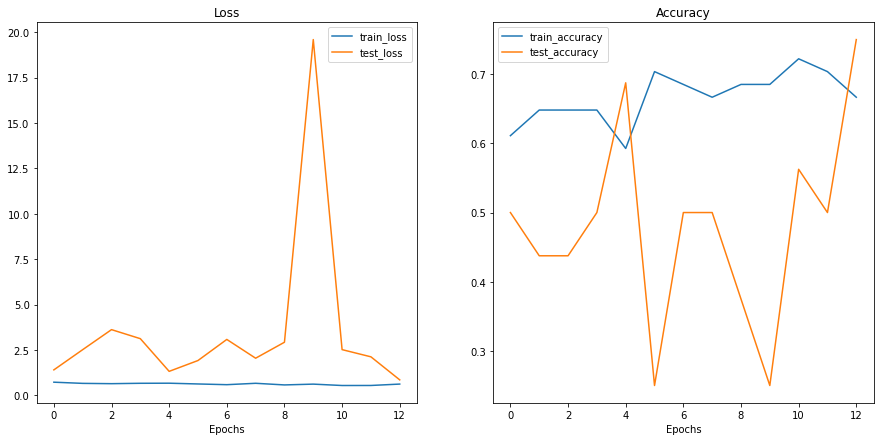

In [ ]:
plot_loss_curves(model_0_results)

## 7.2 Making a prediction on our data images

In [ ]:
custom_image_path = "/content/data/Monkeypox-data-master/MonkeypoxandMeasles/test/Monkeypox/35.jpg"

In [ ]:
# read the ccustom image
custom_image = torchvision.io.read_image(str(custom_image_path))

print(f"Custom image tensor:\n{custom_image}")
print(f"Custom image shape:\n{custom_image.shape}")
print(f"Custom image datatype:\n{custom_image.dtype}")

Custom image tensor:
tensor([[[199, 198, 195,  ..., 146, 143, 141],
         [195, 194, 191,  ..., 147, 145, 143],
         [198, 196, 193,  ..., 148, 147, 146],
         ...,
         [157, 158, 162,  ..., 182, 184, 186],
         [157, 158, 162,  ..., 185, 185, 186],
         [157, 158, 162,  ..., 188, 187, 186]],

        [[147, 146, 143,  ...,  87,  84,  82],
         [143, 142, 139,  ...,  88,  86,  84],
         [146, 144, 141,  ...,  89,  88,  87],
         ...,
         [ 92,  96, 102,  ..., 138, 140, 142],
         [ 92,  96, 102,  ..., 141, 141, 142],
         [ 92,  96, 102,  ..., 144, 143, 142]],

        [[125, 124, 121,  ...,  73,  70,  68],
         [121, 120, 117,  ...,  74,  72,  70],
         [124, 122, 119,  ...,  75,  74,  73],
         ...,
         [ 96,  97, 101,  ..., 109, 111, 113],
         [ 96,  97, 102,  ..., 112, 112, 113],
         [ 96,  97, 102,  ..., 115, 114, 113]]], dtype=torch.uint8)
Custom image shape:
torch.Size([3, 179, 270])
Custom image datatyp

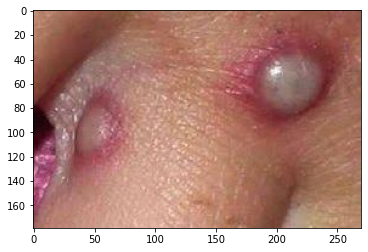

In [ ]:
# show/plot the image
plt.imshow(custom_image.permute(1,2,0))

In [ ]:
# normalize the image 
custom_image = torchvision.io.read_image(str(custom_image_path)).type(torch.float32) / 255.

# lets look at the tensor of the image
custom_image

tensor([[[0.7804, 0.7765, 0.7647,  ..., 0.5725, 0.5608, 0.5529],
         [0.7647, 0.7608, 0.7490,  ..., 0.5765, 0.5686, 0.5608],
         [0.7765, 0.7686, 0.7569,  ..., 0.5804, 0.5765, 0.5725],
         ...,
         [0.6157, 0.6196, 0.6353,  ..., 0.7137, 0.7216, 0.7294],
         [0.6157, 0.6196, 0.6353,  ..., 0.7255, 0.7255, 0.7294],
         [0.6157, 0.6196, 0.6353,  ..., 0.7373, 0.7333, 0.7294]],

        [[0.5765, 0.5725, 0.5608,  ..., 0.3412, 0.3294, 0.3216],
         [0.5608, 0.5569, 0.5451,  ..., 0.3451, 0.3373, 0.3294],
         [0.5725, 0.5647, 0.5529,  ..., 0.3490, 0.3451, 0.3412],
         ...,
         [0.3608, 0.3765, 0.4000,  ..., 0.5412, 0.5490, 0.5569],
         [0.3608, 0.3765, 0.4000,  ..., 0.5529, 0.5529, 0.5569],
         [0.3608, 0.3765, 0.4000,  ..., 0.5647, 0.5608, 0.5569]],

        [[0.4902, 0.4863, 0.4745,  ..., 0.2863, 0.2745, 0.2667],
         [0.4745, 0.4706, 0.4588,  ..., 0.2902, 0.2824, 0.2745],
         [0.4863, 0.4784, 0.4667,  ..., 0.2941, 0.2902, 0.

In [ ]:
# transform the image
custom_image_transform = transforms.Compose([
                                            transforms.Resize(size = (64,64))
])

custom_image_tran = custom_image_transform(custom_image)

# Print out the shapes
print(f"Original shape: {custom_image.shape}")
print(f"Transformed shape: {custom_image_tran.shape}")

Original shape: torch.Size([3, 179, 270])
Transformed shape: torch.Size([3, 64, 64])


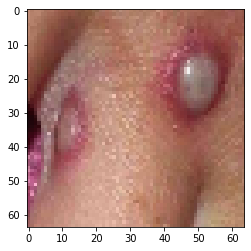

In [ ]:
# plot the image
plt.imshow(custom_image_tran.permute(1,2,0))

In [ ]:
device

'cuda'

In [ ]:
custom_image_tran.shape,   custom_image_tran.unsqueeze(0).shape

(torch.Size([3, 64, 64]), torch.Size([1, 3, 64, 64]))

In [ ]:
model_0.eval()
with torch.inference_mode():
  custom_image_pred = model_0(custom_image_tran.unsqueeze(0).to(device))

custom_image_pred

tensor([[-4.6442,  3.9721]], device='cuda:0')

In [ ]:
# convert from logits to prediction probabilities
custom_image_pred_probs = torch.softmax(custom_image_pred, dim = 1)
custom_image_pred_probs

tensor([[1.8109e-04, 9.9982e-01]], device='cuda:0')

In [ ]:
# then convert from prediction probability into prediction label
custom_image_pred_label = torch.argmax(custom_image_pred_probs, dim = 1).cpu()
custom_image_pred_label

tensor([1])

In [ ]:
# print the spacific label of the test image
class_names[custom_image_pred_label]

'Monkeypox'

## 8. Git all together and Built the function

In [ ]:
from typing import List

In [ ]:
def pred_and_plot_image(model: torch.nn.Module,
                        image_path: str,
                        class_names: List[str] = None,
                        transform=None,
                        device=device):
  # Load in the image
  target_image = torchvision.io.read_image(str(image_path)).type(torch.float32)

  # Divide the image pixel values by 255 to get them between [0, 1], normalizin the image 
  target_image = target_image / 255.

  # Transform if necessary
  if transform:
    target_image = transform(target_image)

  # Make sure the model is on the target device
  model.to(device)

  # Turn on eval/inference mode and make a prediction
  model.eval()
  with torch.inference_mode():
    # Add an extra dimension to the image (this is the batch dimension, e.g. our model will predict on batches of 1x image)
    target_image = target_image.unsqueeze(0)

    # Make a prediction on the image with an extra dimension
    target_image_pred = model(target_image.to(device)) # make sure the target image is on the right device

  # Convert logits -> prediction probabilities
  target_image_pred_probs = torch.softmax(target_image_pred, dim=1)

  # Convert predction probabilities -> prediction labels
  target_image_pred_label = torch.argmax(target_image_pred_probs, dim=1)

  # Plot the image alongside the prediction and prediction probability
  plt.imshow(target_image.squeeze().permute(1, 2, 0)) # remove batch dimension and rearrange shape to be HWC
  if class_names:
    title = f"Pred: {class_names[target_image_pred_label.cpu()]} | Prob: {target_image_pred_probs.max().cpu():.3f}"
  else:
    title = f"Pred: {target_image_pred_label} | Prob: {target_image_pred_probs.max().cpu():.3f}"
  plt.title(title)
  plt.axis(False)

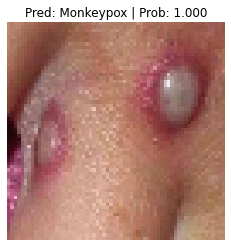

In [ ]:
# Pred on our custom image
pred_and_plot_image(model=model_0,
                    image_path=custom_image_path,
                    class_names=class_names,
                    transform=custom_image_transform,
                    device=device)

## 9. Make prediction with all image data 

In [ ]:
def make_predictions(model: torch.nn.Module,
                     data: list,
                     device: torch.device = device):
  pred_probs = []
  model.to(device)
  model.eval()
  with torch.inference_mode():
    for sample in data:
      # Prepare the sample (add a batch dimension and pass to target device)
      sample = torch.unsqueeze(sample, dim=0).to(device)

      # Forward pass (model outputs raw logits)
      pred_logit = model(sample)

      # Get prediction probability (logit -> prediction probability)
      pred_prob = torch.softmax(pred_logit.squeeze(), dim=0)

      # Get pred_prob off the GPU for further calculations
      pred_probs.append(pred_prob.cpu())

  # Stack the pred_probs to turn list into a tensor
  return torch.stack(pred_probs)

In [ ]:
import random
# random.seed(42)
test_samples = [] 
test_labels = []
for sample, label in random.sample(list(test_data), k=9):
  test_samples.append(sample)
  test_labels.append(label)

# View the first sample shape
test_samples[0].shape

torch.Size([3, 64, 64])

Text(0.5, 1.0, 'Measles')

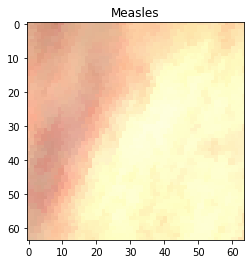

In [ ]:
plt.imshow(test_samples[0].permute(1,2,0), cmap="gray")
plt.title(class_names[test_labels[0]])

In [ ]:
# Make predictions
pred_probs = make_predictions(model=model_0,
                              data=test_samples)

# View first two prediction probabilities
pred_probs[:2]

tensor([[0.7752, 0.2248],
        [0.8740, 0.1260]])

In [ ]:
# Convert prediction probabilities to labels
pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([0, 0, 0, 1, 1, 1, 1, 1, 1])

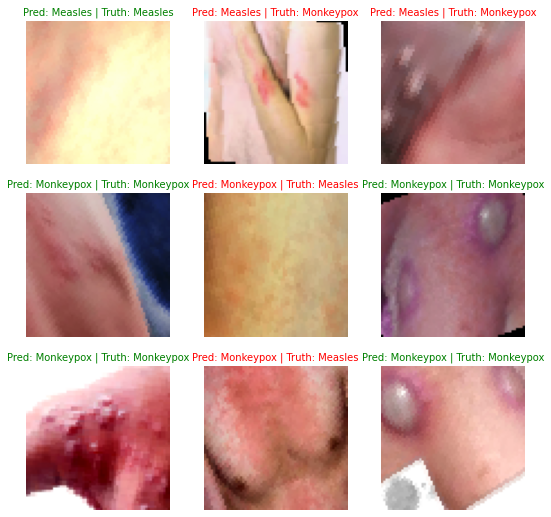

In [ ]:
# Plot predictions
plt.figure(figsize=(9, 9))
nrows = 3
ncols = 3
for i, sample in enumerate(test_samples):
  # Create subplot
  plt.subplot(nrows, ncols, i+1)

  # Plot the target image
  plt.imshow(sample.permute(1,2,0), cmap="gray")

  # Find the prediction (in text form, e.g "Sandal")
  pred_label = class_names[pred_classes[i]]

  # Get the truth label (in text form) 
  truth_label = class_names[test_labels[i]]

  # Create a title for the plot
  title_text = f"Pred: {pred_label} | Truth: {truth_label}"

  # Check for equality between pred and truth and change color of title text
  if pred_label == truth_label:
    plt.title(title_text, fontsize=10, c="g") # green text if prediction same as truth
  else:
    plt.title(title_text, fontsize=10, c="r") 
  
  plt.axis(False);

## The end